In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Neural Network

In [3]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

In [4]:
def tanh(Z):
    return np.tanh(Z)

In [5]:
def relu(Z):
    return Z * (Z > 0)

In [6]:
def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1,keepdims=True)

In [24]:
# Cost for softmax
def cost(T,Y):
    tot = (-T * np.log(Y))
    return tot.sum()

In [8]:
# Cost for binary classification
def cross_entropy(T, Y):
    return -(np.sum(T*np.log(Y) + (1-T)*np.log(1-Y)))

In [9]:
def forward(X,W1,W2,b1,b2):
    Z = tanh(X.dot(W1) + b1)
    A = Z.dot(W2) + b2
    Y = softmax(A)
    return Y,Z

In [128]:
def fit(X,y,M,learnR,reg):
    N,D= X.shape
    M = M
    K = len(set(y))#y.flatten))
    l = learnR
    
    Y = np.zeros((N,K))
    for i in range(N):
        Y[i,y[i]] = 1
    
    W1 = np.random.randn(D,M) / np.sqrt(D + M)
    b1 = np.random.randn(M) / np.sqrt(M)
    W2 = np.random.randn(M,K) / np.sqrt(M + K)
    b2 = np.random.randn(K) / np.sqrt(K)
    
    costs = []
    for i in range(30000):
        Yp,Z = forward(X,W1,W2,b1,b2)
        c = cost(Y,Yp)
        costs.append(c)
        
        W2 += l * (Z.T.dot(Y-Yp) - reg*W2)
        b2 += l * ((Y-Yp).sum() - reg*b2)
        dZ = (Y-Yp).dot(W2.T)*(1-Z*Z)
        W1 += l * (X.T.dot(dZ) - reg*W1)
        b1 += l * (dZ.sum() - reg*b1)
        
        if (i % 10000 == 0):
            print(i,c)
    
    return costs,Yp,W1,W2,b1,b2

## Training Data 1

In [99]:
N = 1000
N2 = (int)(N / 2)

In [100]:
X1 = np.random.randn(N,2) + np.array([0,-2])
X2 = np.random.randn(N,2) + np.array([2,2])
X3 = np.random.randn(N,2) + np.array([-2,2])
X_train = np.vstack([X1[:N2],X2[:N2],X3[:N2]])
X_test = np.vstack([X1[N2:],X2[N2:],X3[N2:]])

In [101]:
Y_train = np.array([0]*N2 + [1]*N2 + [2]*N2)
Y_ind = np.zeros((len(X_train),len(set(Y_train))))
for i in range(len(Y_ind)):
    Y_ind[i,Y_train[i]] = 1

In [129]:
Yhat = []
learn_r = 1*10e-4
reg = 0
output = fit(X_train,Y_train,5,learn_r,reg)

0 1866.268896179541
10000 104.65873684434592
20000 104.64122894715878


In [131]:
costs = output[0]
Yp = output[1]
W1 = output[2]
W2 = output[3]
b1 = output[4]
b2 = output[5]
T = np.argmax(Y_ind,axis=1)
Ty = np.argmax(Yp, axis=1)

In [137]:
print(f"Training Classification Rate: {np.mean(T == Ty):.4}")

Training Classification Rate: 0.9727


In [138]:
Yp,_ = forward(X_test,W1,W2,b1,b2)
Ty = np.argmax(Yp,axis=1)

In [140]:
print(f"Test Classification Rate: {np.mean(T == Ty):.4}")

Test Classification Rate: 0.9733


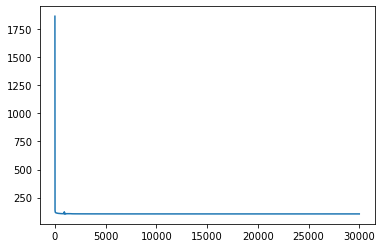

In [136]:
plt.plot(costs)
plt.show()

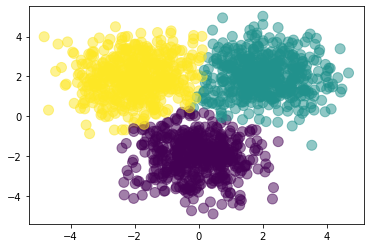

In [142]:
plt.scatter(X_test[:,0],X_test[:,1],c=Ty,s=100,alpha=0.5)
plt.show()